In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import keras.utils

In [2]:
path = []
labels = []
import os
for dirname, _, filenames in os.walk(r"C:\Users\Hp\OneDrive\Desktop\speech\TESS Toronto emotional speech set data"):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('dataset is loaded')

dataset is loaded


In [3]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label
0,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
1,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
2,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
3,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
4,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry


In [4]:
df = df[df['label']. isin(['angry','neutral','happy','sad'])]

In [5]:
df['label'].value_counts()

angry      800
happy      800
neutral    800
sad        800
Name: label, dtype: int64

In [6]:
def waveplot(data,sr,emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data,sr = sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10,4))
    plt.title(emotion,size = 20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis = 'hz')
    plt.colorbar()

<Axes: xlabel='label', ylabel='count'>

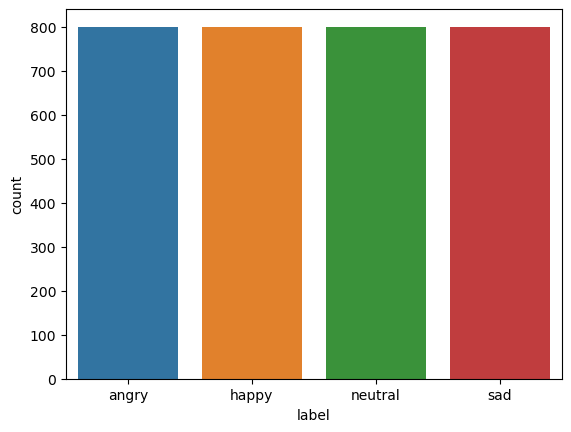

In [7]:
sns.countplot(df,x='label')

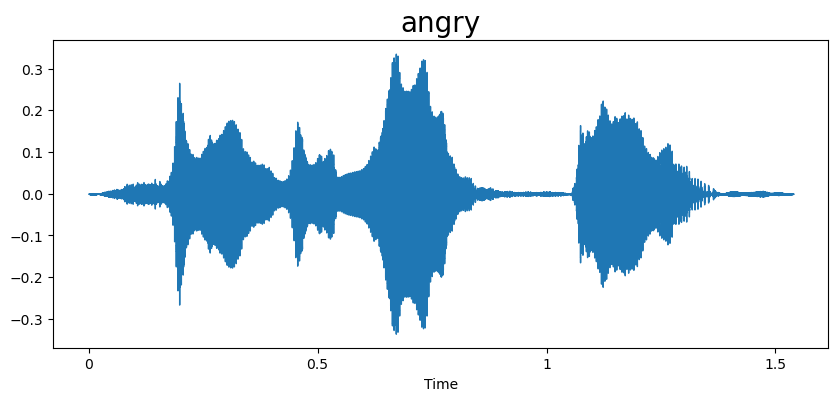

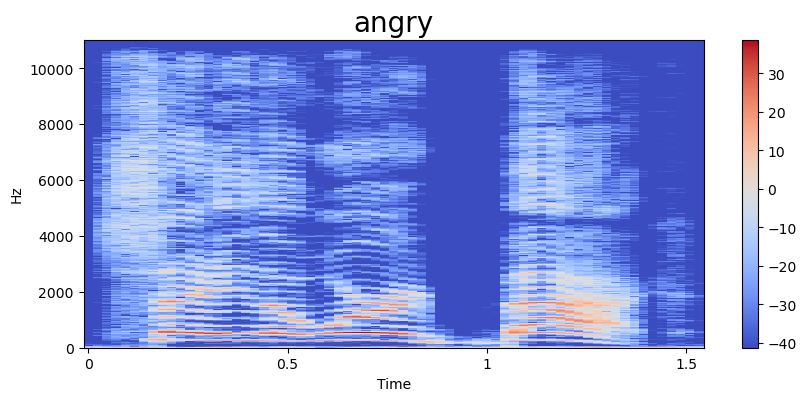

In [8]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

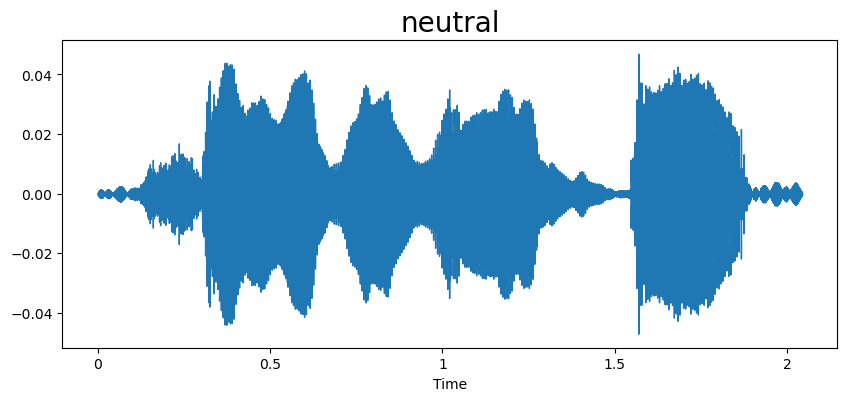

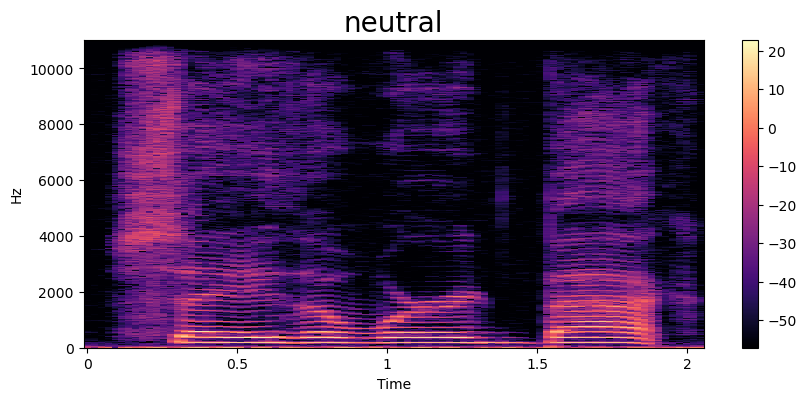

In [9]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

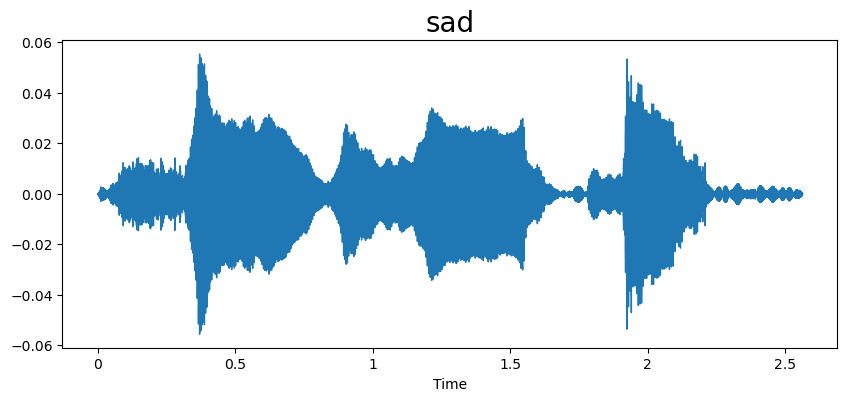

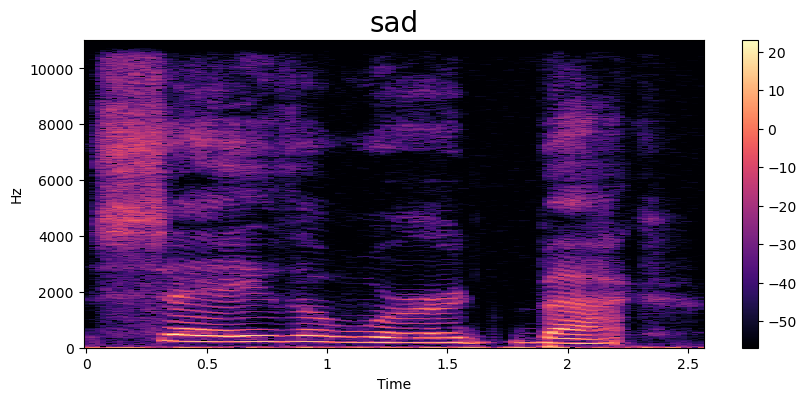

In [10]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

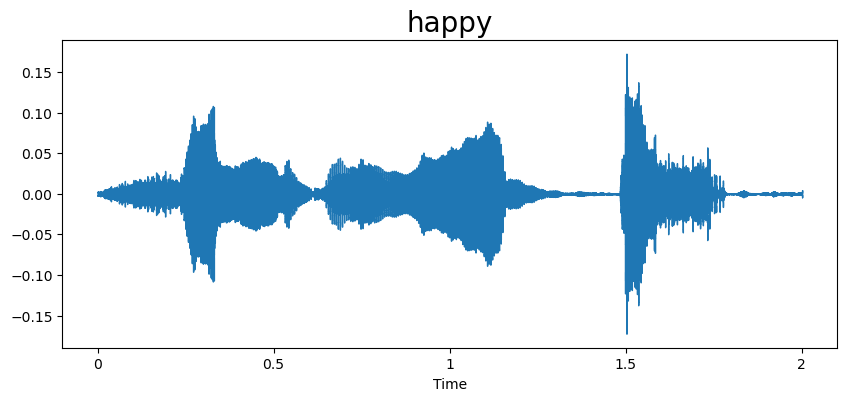

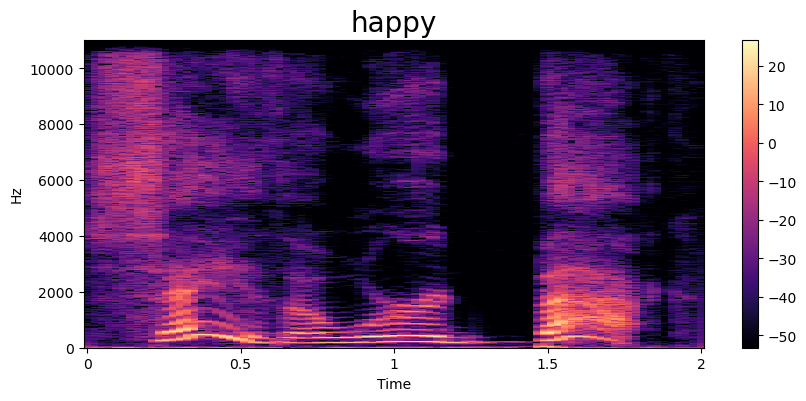

In [11]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [12]:
df.head()

,speech,label
0,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
1,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
2,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
3,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry
4,C:\Users\Hp\OneDrive\Desktop\speech\TESS Toron...,angry


In [13]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration = 3,offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T, axis = 0)
    return mfcc

In [14]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [15]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [16]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5550    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5551    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5552    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5553    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5554    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 3200, dtype: object

In [17]:
X = [x for x in x_mfcc ]
X = np.array(X)
X.shape

(3200, 40)

In [18]:
X = np.expand_dims(X, -1)
X.shape

(3200, 40, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [20]:
y = y.toarray()

In [21]:
y.shape

(3200, 4)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [23]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)